In [203]:
#pip installs
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install PyPortfolioOpt

In [ ]:
#Description
#This code is an Initial Data Analysis for Portfolio Optimiziation. The Stocks in this portfolio are Facebook, Amazon, Google, and WeWork.

In [204]:
#import libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
plt.style.use('fivethirtyeight')

In [205]:
#get stock symbols
assets = ["FB", "AMZN", "GOOG", "WE"]

#end today and time window
today = datetime.today().strftime("%Y-%m-%d")
delta = timedelta(days =- 1826)
start = datetime.today() + delta

#get the stock start date and var start date
stockStartDate = start
varStartDate = '2015-08-04' #this way we get 30 and 90 day var
weWorkIPO = '2021-10-22'

In [206]:
#create dataframe to store adjusted close price
#We need multiple dataframes to make assumptions on trades. We assume two trades buy & sell each day to map volatility.
df = pd.DataFrame()
dfClose = pd.DataFrame()
dfOpen = pd.DataFrame()

In [207]:
#store the adjusted price in df
for stock in assets:
  dfClose[stock] = web.DataReader(stock, data_source = "yahoo", start = varStartDate, end = today)['Adj Close']#, ['Open']
  dfOpen[stock] = web.DataReader(stock, data_source = "yahoo", start = varStartDate, end = today)['Open']

In [208]:
#find the daily returns 
#undo to find variance later
df = ((dfClose - dfOpen) / dfOpen)
df = df * 100

In [209]:
#clean the Nans for WE because it launched its IPO in Oct 2021
df['WE'] = df['WE'].fillna(0)
dfClose['WE'] = dfClose['WE'].fillna(0)

In [210]:
#create a dataframe for percent daily returns (non-rolling) and clean
dfReturns = dfClose.pct_change()
dfReturns['WE'] = dfReturns['WE'].fillna(0)

In [211]:
#generate 30 day rolling vars
df['FB Var(30)'] = df['FB'].rolling(30).var() / 10000
df['AMZN Var(30)'] = df['AMZN'].rolling(30).var() / 10000
df['GOOG Var(30)'] = df['GOOG'].rolling(30).var() / 10000
df['WE Var(30)'] = df['WE'].rolling(30).var() / 10000

In [212]:
#generate 90 day rolling vars
df['FB Var(90)'] = df['FB'].rolling(90).var() / 10000
df['AMZN Var(90)'] = df['AMZN'].rolling(90).var() / 10000
df['GOOG Var(90)'] = df['GOOG'].rolling(90).var() / 10000
df['WE Var(90)'] = df['WE'].rolling(90).var() / 10000

In [213]:
#find rolling mean of returns
df['FB_Hit'] = df['FB'].rolling(30).sum()
df['AMZN_Hit'] = df['AMZN'].rolling(30).sum()
df['GOOG_Hit'] = df['GOOG'].rolling(30).sum()
df['WE_Hit'] = df['WE'].rolling(30).sum()

In [214]:
#assign rolling means hits and losses
df['FB_Hit_Loss'] = df['FB_Hit'].map(lambda x: "HIT" if x > 0 else "LOSS")
df['AMZN_Hit_Loss'] = df['AMZN_Hit'].map(lambda x: "HIT" if x > 0 else "LOSS")
df['GOOG_Hit_Loss'] = df['GOOG_Hit'].map(lambda x: "HIT" if x > 0 else "LOSS")
df['WE_Hit_Loss'] = df['WE_Hit'].map(lambda x: "HIT" if x > 0 else "LOSS")

Text(0, 0.5, 'Count')

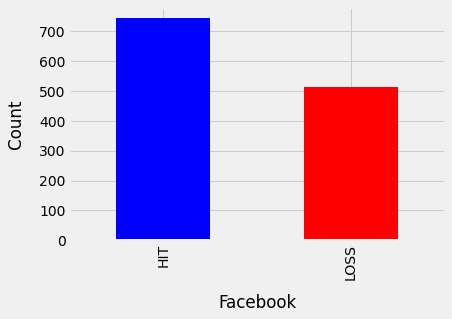

In [254]:
#bar graph to visulaize the hits and losses for FB
df['FB_Hit_Loss'].value_counts().plot(kind = 'bar', color = ('b', 'r'))
plt.xlabel("Facebook", labelpad = 14)
plt.ylabel("Count", labelpad = 14)

Text(0, 0.5, 'Count')

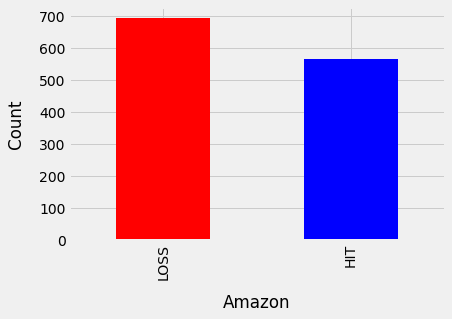

In [258]:
#bar graph to visulaize the hits and losses for FB
df['AMZN_Hit_Loss'].value_counts().plot(kind = 'bar', color = ('r', 'b'))
plt.xlabel("Amazon", labelpad = 14)
plt.ylabel("Count", labelpad = 14)

Text(0, 0.5, 'Count')

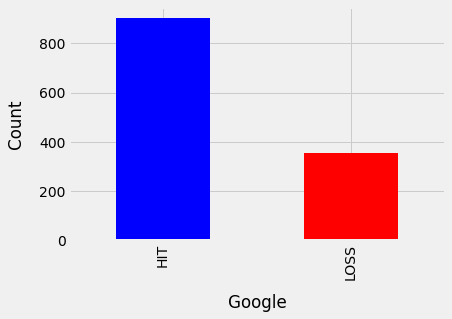

In [256]:
#bar graph to visulaize the hits and losses for FB
df['GOOG_Hit_Loss'].value_counts().plot(kind = 'bar', color = ('b', 'r'))
plt.xlabel("Google", labelpad = 14)
plt.ylabel("Count", labelpad = 14)

Text(0, 0.5, 'Count')

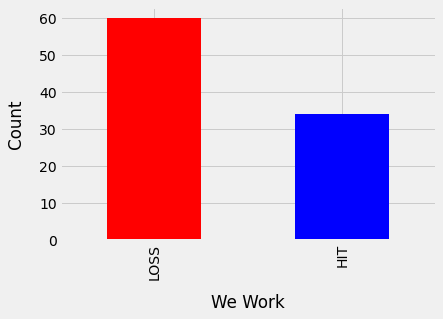

In [261]:
# truncate to IPO
dfWeWorkIPO = df['WE_Hit_Loss'].truncate(before = weWorkIPO)
#bar graph to visulaize the hits and losses for FB
dfWeWorkIPO .value_counts().plot(kind = 'bar', color = ('r', 'b'))
plt.xlabel("We Work", labelpad = 14)
plt.ylabel("Count", labelpad = 14)

In [215]:
#finding slugging ratio with yearly wins and losses
df['FB_Slug'] = df['FB'].rolling(30).mean()
df['AMZN_Slug'] = df['AMZN'].rolling(30).mean()
df['GOOG_Slug'] = df['GOOG'].rolling(30).mean()
df['WE_Slug'] = df['WE'].rolling(30).mean()

In [216]:
#truncate
df = df.truncate(before = stockStartDate)

#round to nearest cent
df = df.round(decimals = 4)

#create a date column
#df = df.reset_index(inplace=True)
#print(df['Date'])

#df.head(50)
print(df)

                FB    AMZN    GOOG       WE  FB Var(30)  AMZN Var(30)  \
Date                                                                    
2017-03-09  0.3776  0.2350  0.3206   0.0000      0.0000        0.0000   
2017-03-10 -0.0864 -0.5298 -0.0036   0.0000      0.0000        0.0000   
2017-03-13  0.6416  0.3311  0.1825   0.0000      0.0000        0.0000   
2017-03-14 -0.1004 -0.1195  0.2347   0.0000      0.0000        0.0000   
2017-03-15  0.3087 -0.1592 -0.0460   0.0000      0.0000        0.0000   
...            ...     ...     ...      ...         ...           ...   
2022-03-02  1.6261  0.7978  0.1064   0.1585      0.0009        0.0008   
2022-03-03 -2.8945 -3.6690 -1.2285  -3.9124      0.0009        0.0008   
2022-03-04 -1.1415 -1.0315 -0.9450 -22.5649      0.0009        0.0008   
2022-03-07 -6.6338 -5.4939 -4.1238  -6.2015      0.0010        0.0008   
2022-03-08  3.1301  0.4170  2.1643   2.6042      0.0010        0.0008   

            GOOG Var(30)  WE Var(30)  FB Var(90)  

In [217]:
#get the x axis for time series
x = df.index[:]

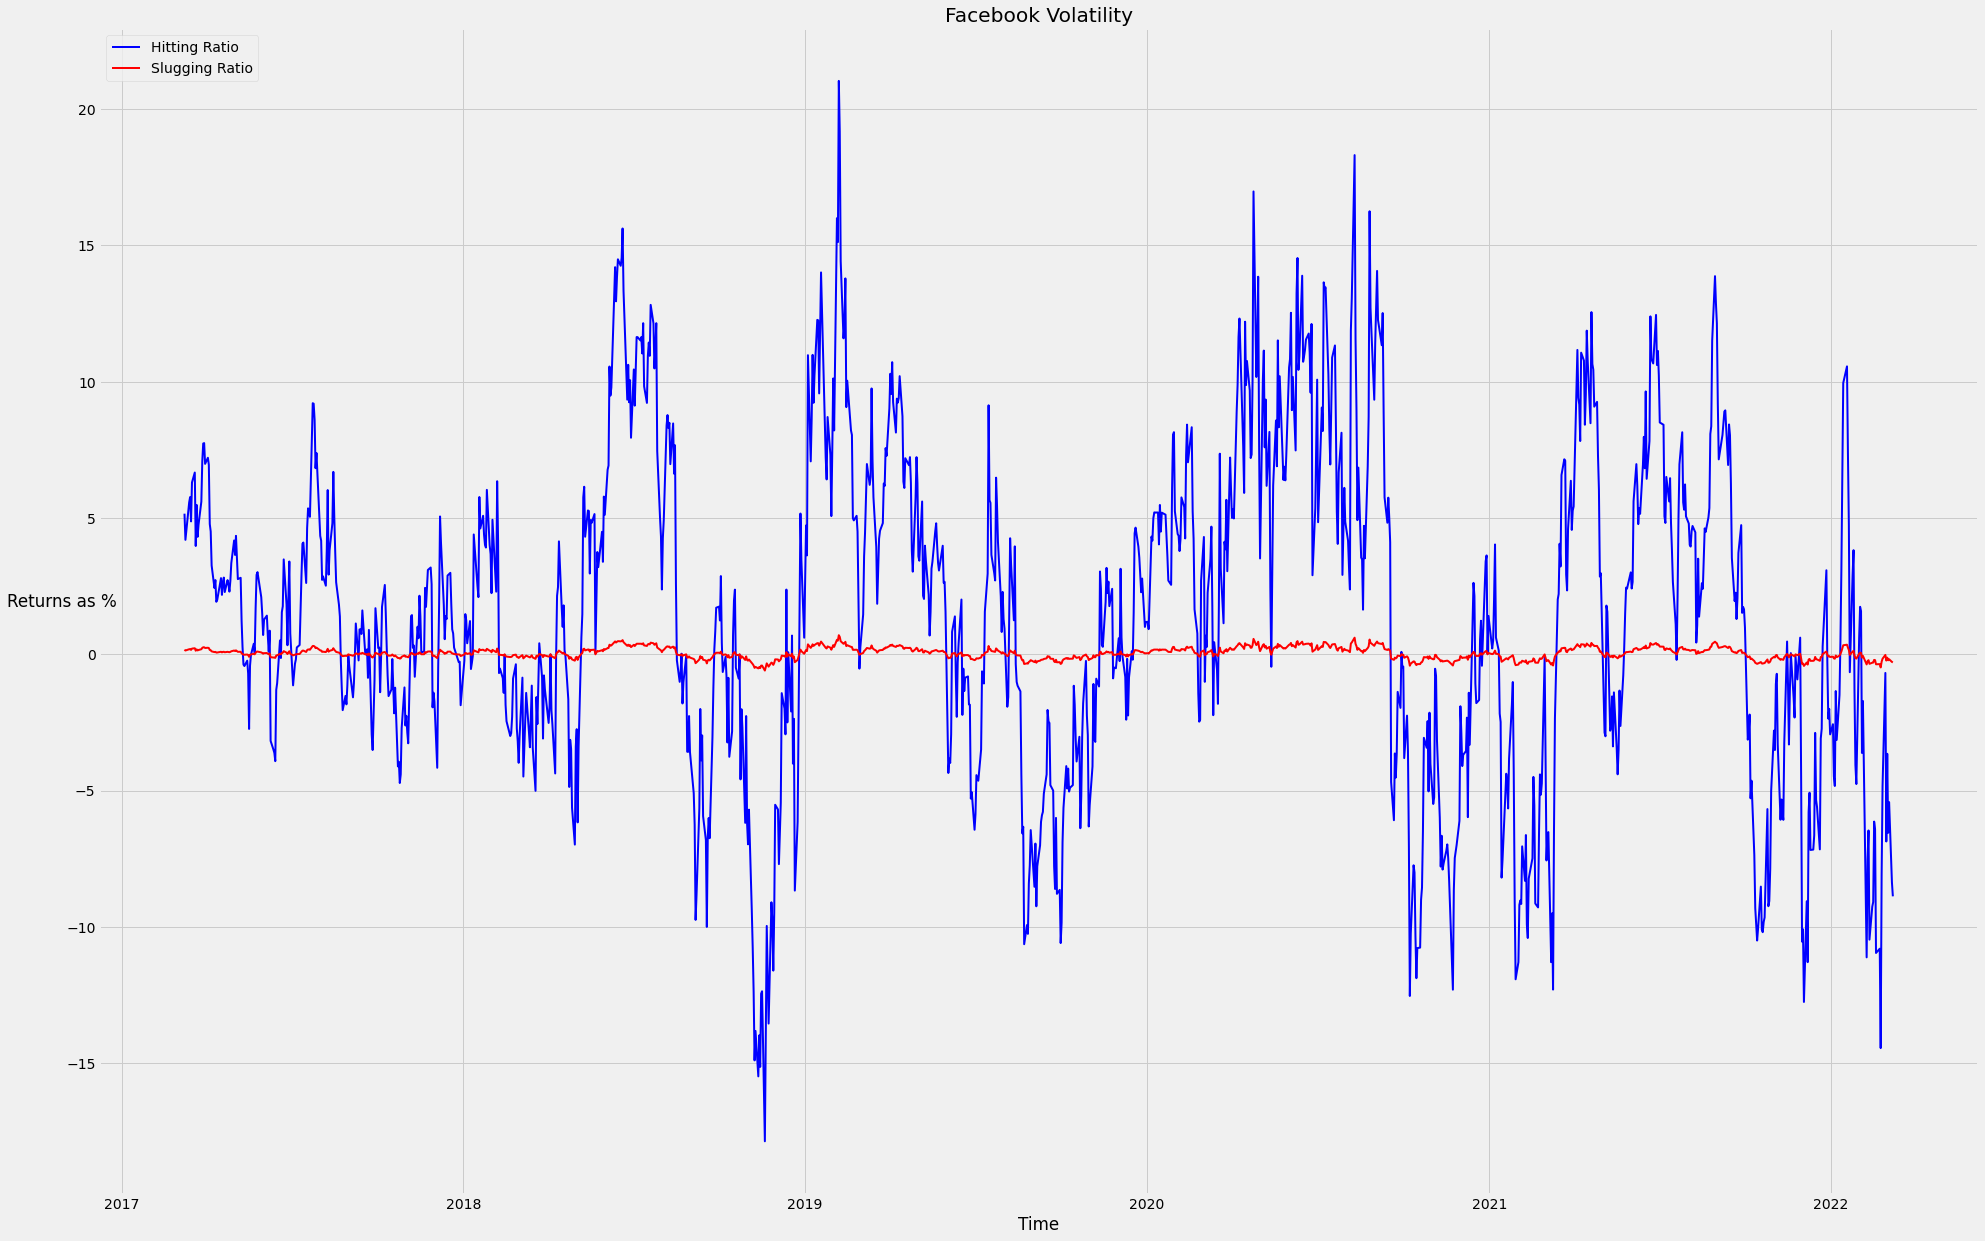

In [218]:
#FB Graph of Hitting and Slugging Ratios
FBHit = df['FB_Hit']
FBSlug = df['FB_Slug']
plt.figure(figsize=(30, 20))
plt.title("Facebook Volatility")
plt.xlabel("Time")
plt.ylabel("Returns as %", rotation = 0)
plt.plot(x, FBHit, "b", label = "Hitting Ratio", linewidth = 2)
plt.plot(x, FBSlug, "r", label = "Slugging Ratio", linewidth = 2)
plt.legend(loc="upper left")
plt.xticks(rotation = 0)
plt.show()

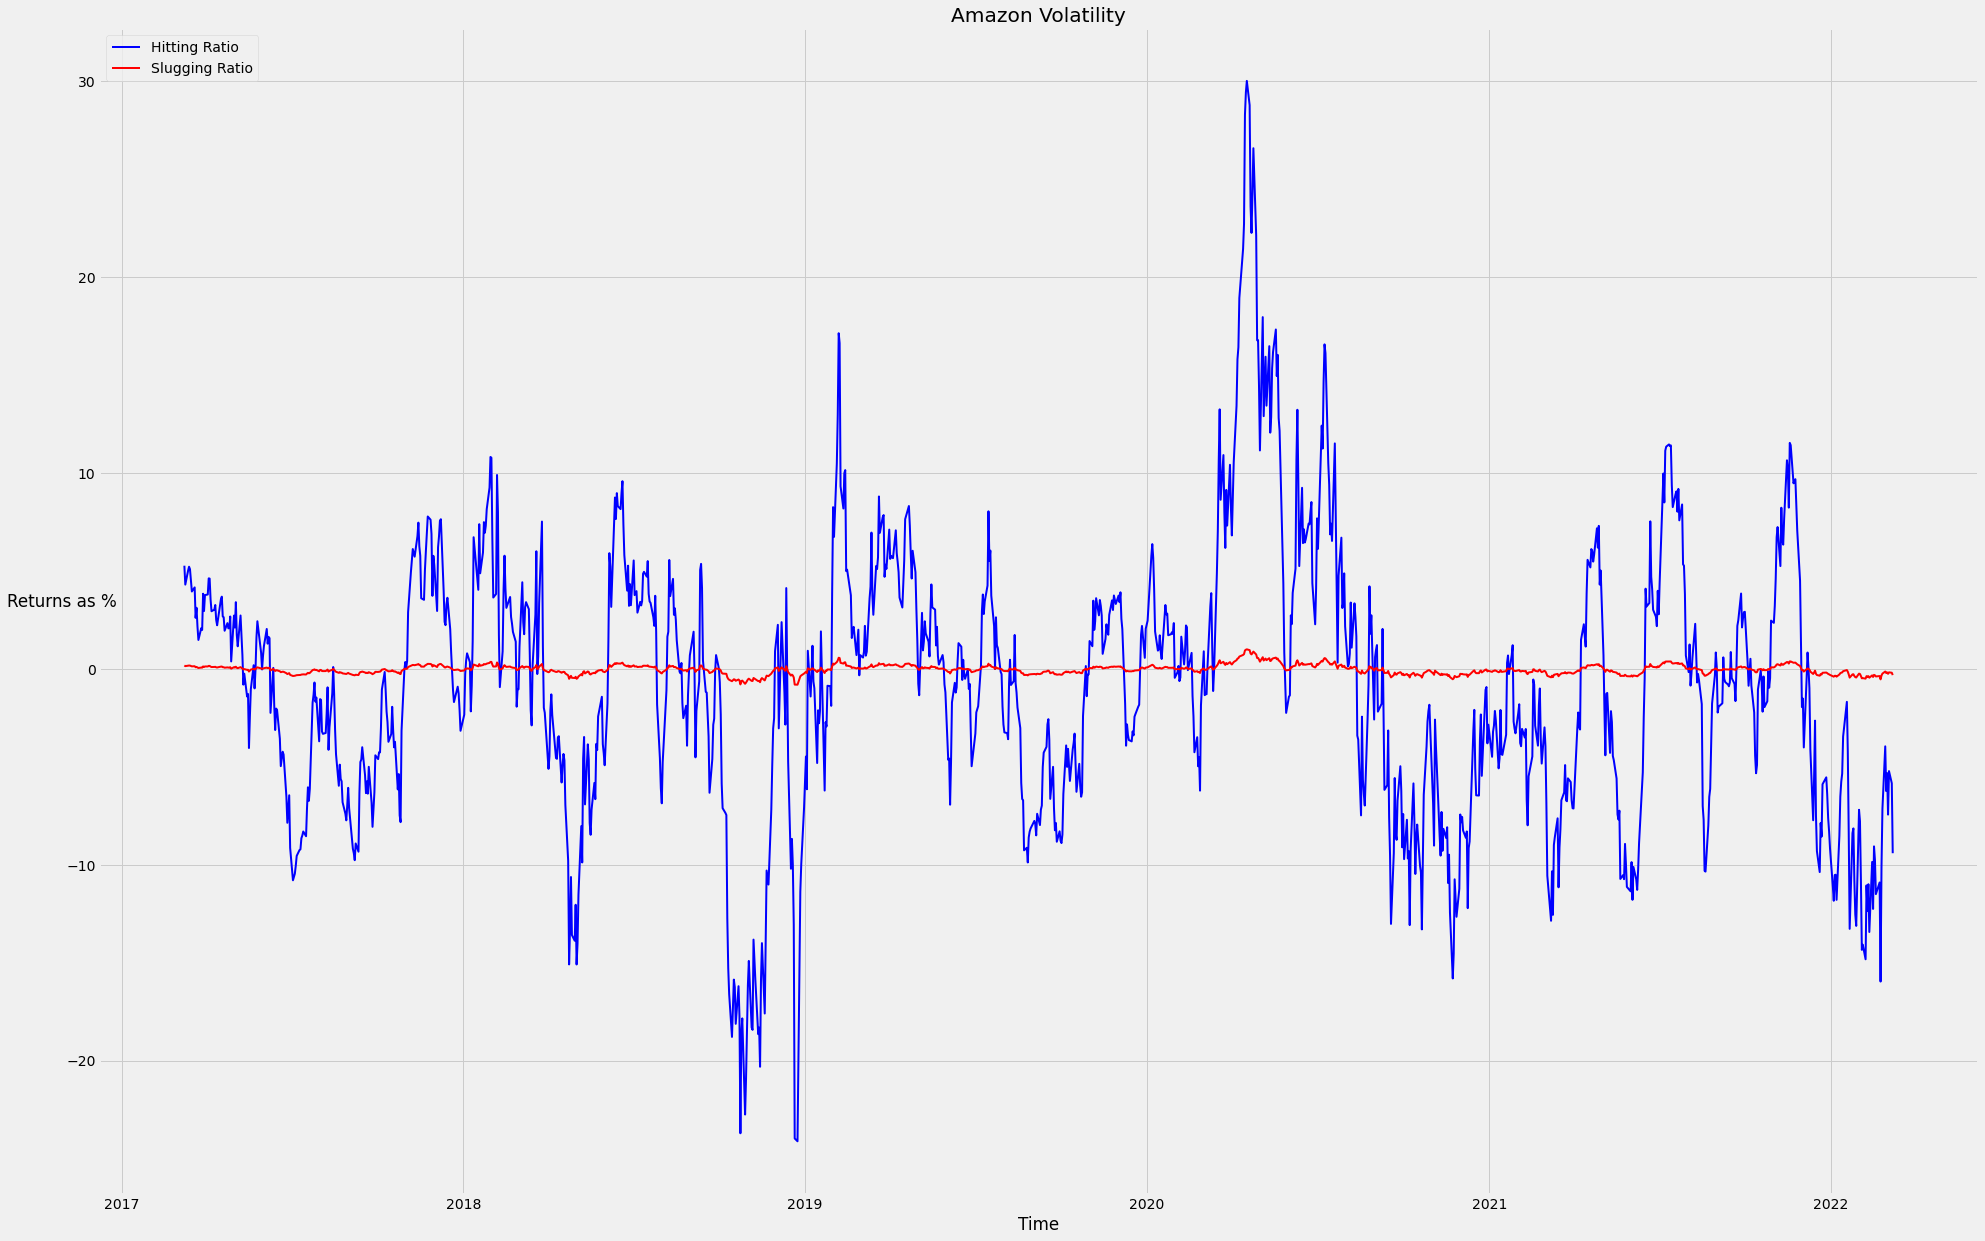

In [219]:
#AMZN Graph of Hitting and Slugging Ratios
AMZNHit = df['AMZN_Hit']
AMZNSlug = df['AMZN_Slug']
plt.figure(figsize=(30, 20))
plt.title("Amazon Volatility")
plt.xlabel("Time")
plt.ylabel("Returns as %", rotation = 0)
plt.plot(x, AMZNHit, "b", label = "Hitting Ratio", linewidth = 2)
plt.plot(x, AMZNSlug, "r", label = "Slugging Ratio", linewidth = 2)
plt.legend(loc="upper left")
plt.xticks(rotation = 0)
plt.show()

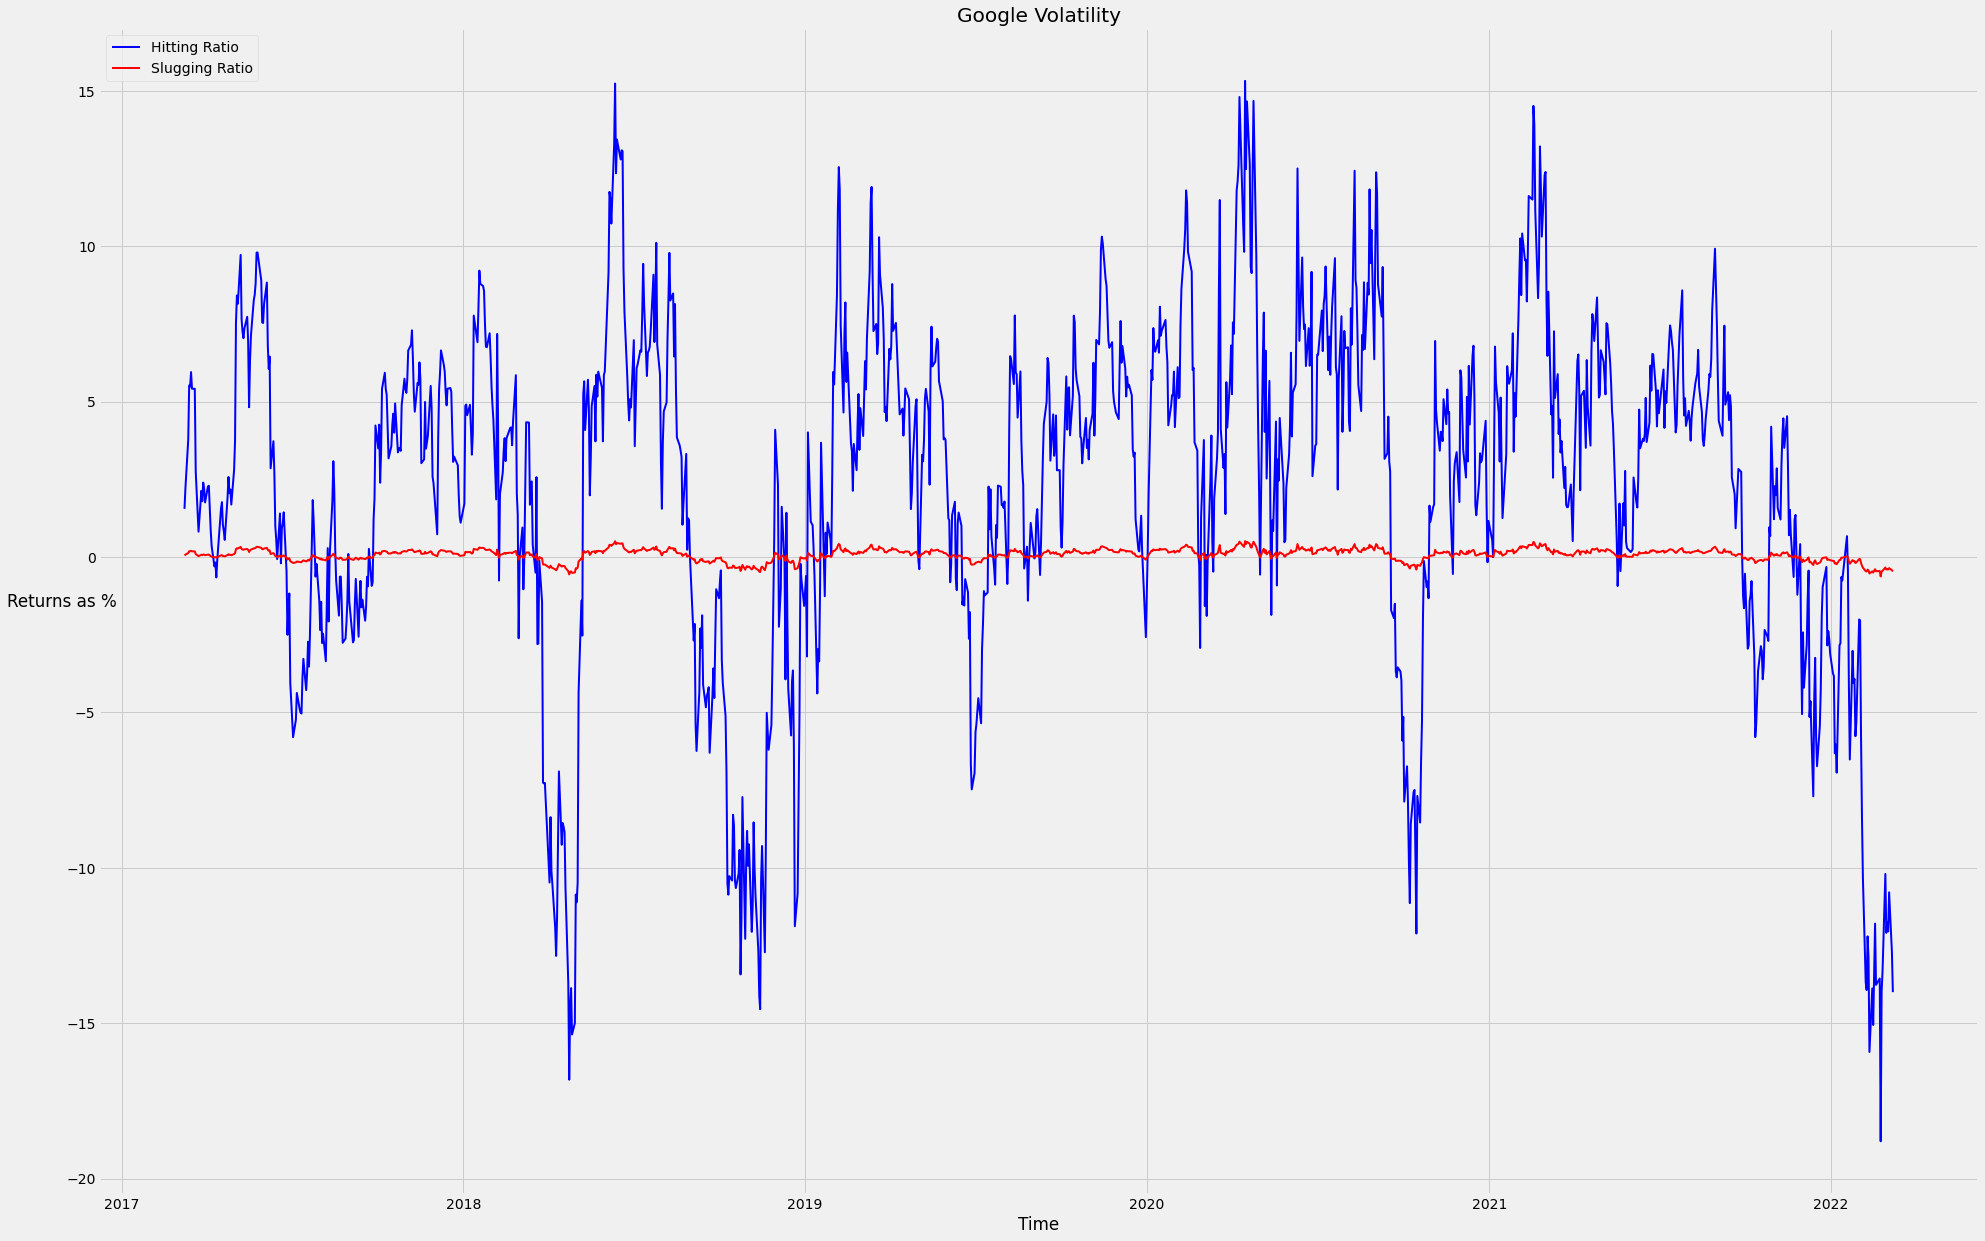

In [220]:
#GOOG Graph of Hitting and Slugging Ratios
GOOGHit = df['GOOG_Hit']
GOOGSlug = df['GOOG_Slug']
plt.figure(figsize=(30, 20))
plt.title("Google Volatility")
plt.xlabel("Time")
plt.ylabel("Returns as %", rotation = 0)
plt.plot(x, GOOGHit, "b", label = "Hitting Ratio", linewidth = 2)
plt.plot(x, GOOGSlug, "r", label = "Slugging Ratio", linewidth = 2)
plt.legend(loc="upper left")
plt.xticks(rotation = 0)
plt.show()

In [221]:
#create a custom dataframe with a range for WeWork's IPO
dfWe = df.truncate(before = weWorkIPO)
xWe = dfWe.index[:]

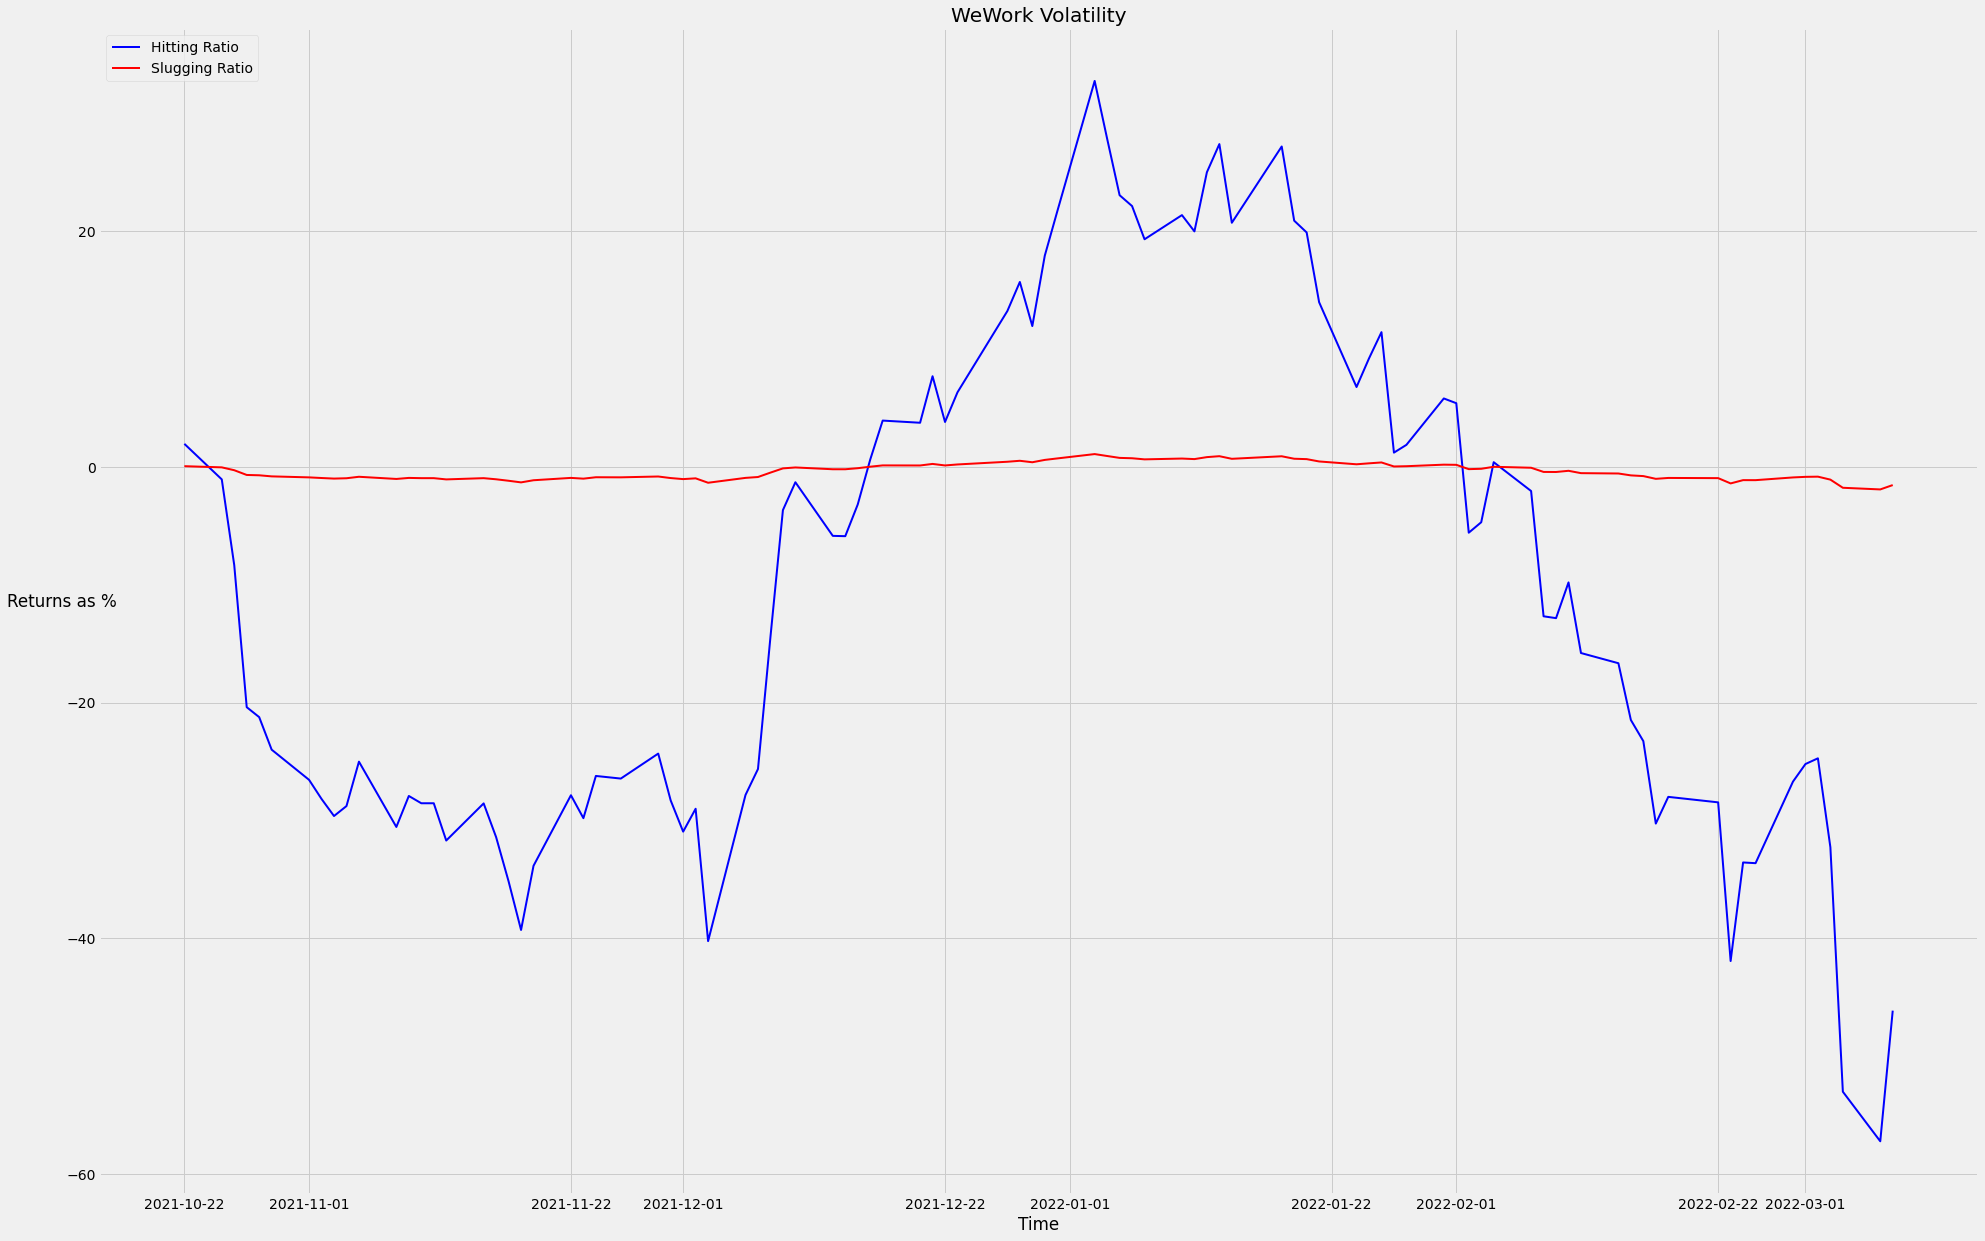

In [222]:
#WE Graph of Hitting and Slugging Ratios
WEHit = dfWe['WE_Hit']
WESlug = dfWe['WE_Slug']
plt.figure(figsize=(30, 20))
plt.title("WeWork Volatility")
plt.xlabel("Time")
plt.ylabel("Returns as %", rotation = 0)
plt.plot(xWe, WEHit, "b", label = "Hitting Ratio", linewidth = 2)
plt.plot(xWe, WESlug, "r", label = "Slugging Ratio", linewidth = 2)
plt.legend(loc="upper left")
plt.xticks(rotation = 0)
plt.show()

In [223]:
#assign initial weights and portfolio
weigths = np.array([0.25, 0.25, 0.25, 0.25])
initialPortfolio = 100000000

In [224]:
#create truncated dataframes for 30 and 90 variance
dfVar30 = df[['FB Var(30)', 'AMZN Var(30)', 'GOOG Var(30)', 'WE Var(30)']].copy()
dfVar90 = df[['FB Var(90)', 'AMZN Var(90)', 'GOOG Var(90)', 'WE Var(90)']].copy()
dfVar30 = dfVar30.truncate(before = stockStartDate)
dfVar90 = dfVar90.truncate(before = stockStartDate)
dfReturns = dfReturns.truncate(before = stockStartDate)
#dfVar30.head()
#dfVar90.head()

dfReturns30 = dfReturns.tail(30)
dfReturns90 = dfReturns.tail(90)
#dfReturns
dfReturns30

,FB,AMZN,GOOG,WE
Date,,,,
2022-01-25,-0.027728,-0.031534,-0.027893,0.022556
2022-01-26,-0.018391,-0.007954,0.019762,-0.039216
2022-01-27,0.000034,0.005509,-0.000921,-0.114796
2022-01-28,0.023995,0.031084,0.032284,0.017291
2022-01-31,0.038282,0.038864,0.018073,0.052408
2022-02-01,0.018323,0.010831,0.016065,0.040377
2022-02-02,0.012539,-0.003843,0.073674,-0.062096
2022-02-03,-0.263901,-0.078128,-0.036383,-0.031724
2022-02-04,-0.002818,0.135359,0.002562,0.038462


In [225]:
#truncate returns to WeWork IPO
dfReturns = dfReturns.truncate(before = weWorkIPO)

In [226]:
#exception handling, the matrix math errors will ignore Nan values not pertinent to the calculations
np.seterr(invalid='ignore')

{'divide': 'warn', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [227]:
#create a covariance matrix
covMatrix = dfReturns.cov() 
covMatrix30 = dfReturns30.cov() * 30
covMatrix90 = dfReturns90.cov() * 90

print(covMatrix)
print(covMatrix30)
print(covMatrix90)

            FB      AMZN      GOOG        WE
FB    0.001284  0.000489  0.000375  0.000321
AMZN  0.000489  0.000640  0.000270  0.000216
GOOG  0.000375  0.000270  0.000366  0.000002
WE    0.000321  0.000216  0.000002  0.002500
            FB      AMZN      GOOG        WE
FB    0.091504  0.034426  0.025298  0.019636
AMZN  0.034426  0.040632  0.014112  0.021497
GOOG  0.025298  0.014112  0.019144  0.008180
WE    0.019636  0.021497  0.008180  0.102815
            FB      AMZN      GOOG        WE
FB    0.117087  0.045466  0.034473  0.032124
AMZN  0.045466  0.059082  0.024163  0.025532
GOOG  0.034473  0.024163  0.031103  0.011492
WE    0.032124  0.025532  0.011492  0.194886


In [194]:
#portfolio variance
portVar30 = np.dot(weigths.T, np.dot(covMatrix30, weigths))
portVar90 = np.dot(weigths.T, np.dot(covMatrix90, weigths))

print(portVar30)
print(portVar90)

0.031057906465403823
0.046613130284034875


In [228]:
#loop to new column on returns that has the portfolio variance
for i in range(len(dfReturns)):
  dfReturns["Portfolio_Variance"] = np.dot(weigths.T, np.dot(covMatrix, weigths)) *  range(len(dfReturns))

print(dfReturns)

                  FB      AMZN      GOOG        WE  Portfolio_Variance
Date                                                                  
2021-10-22 -0.050515 -0.028955 -0.029104  0.105263            0.000000
2021-10-25  0.012569 -0.004551  0.001068  0.012289            0.000508
2021-10-26 -0.039186  0.016775  0.006478 -0.062974            0.001017
2021-10-27 -0.011368  0.004864  0.048367 -0.161134            0.001525
2021-10-28  0.015054  0.015941 -0.002039  0.020270            0.002034
...              ...       ...       ...       ...                 ...
2022-03-02  0.022704  0.006024  0.004349  0.009585            0.045255
2022-03-03 -0.024698 -0.027320 -0.003291 -0.028481            0.045763
2022-03-04 -0.014337 -0.015264 -0.016276 -0.223127            0.046272
2022-03-07 -0.062931 -0.056220 -0.042820  0.014675            0.046780
2022-03-08  0.033391 -0.001451  0.019915  0.017562            0.047289

[94 rows x 5 columns]


In [229]:
#create timelince for portfolio
xPort = dfReturns.index[:]

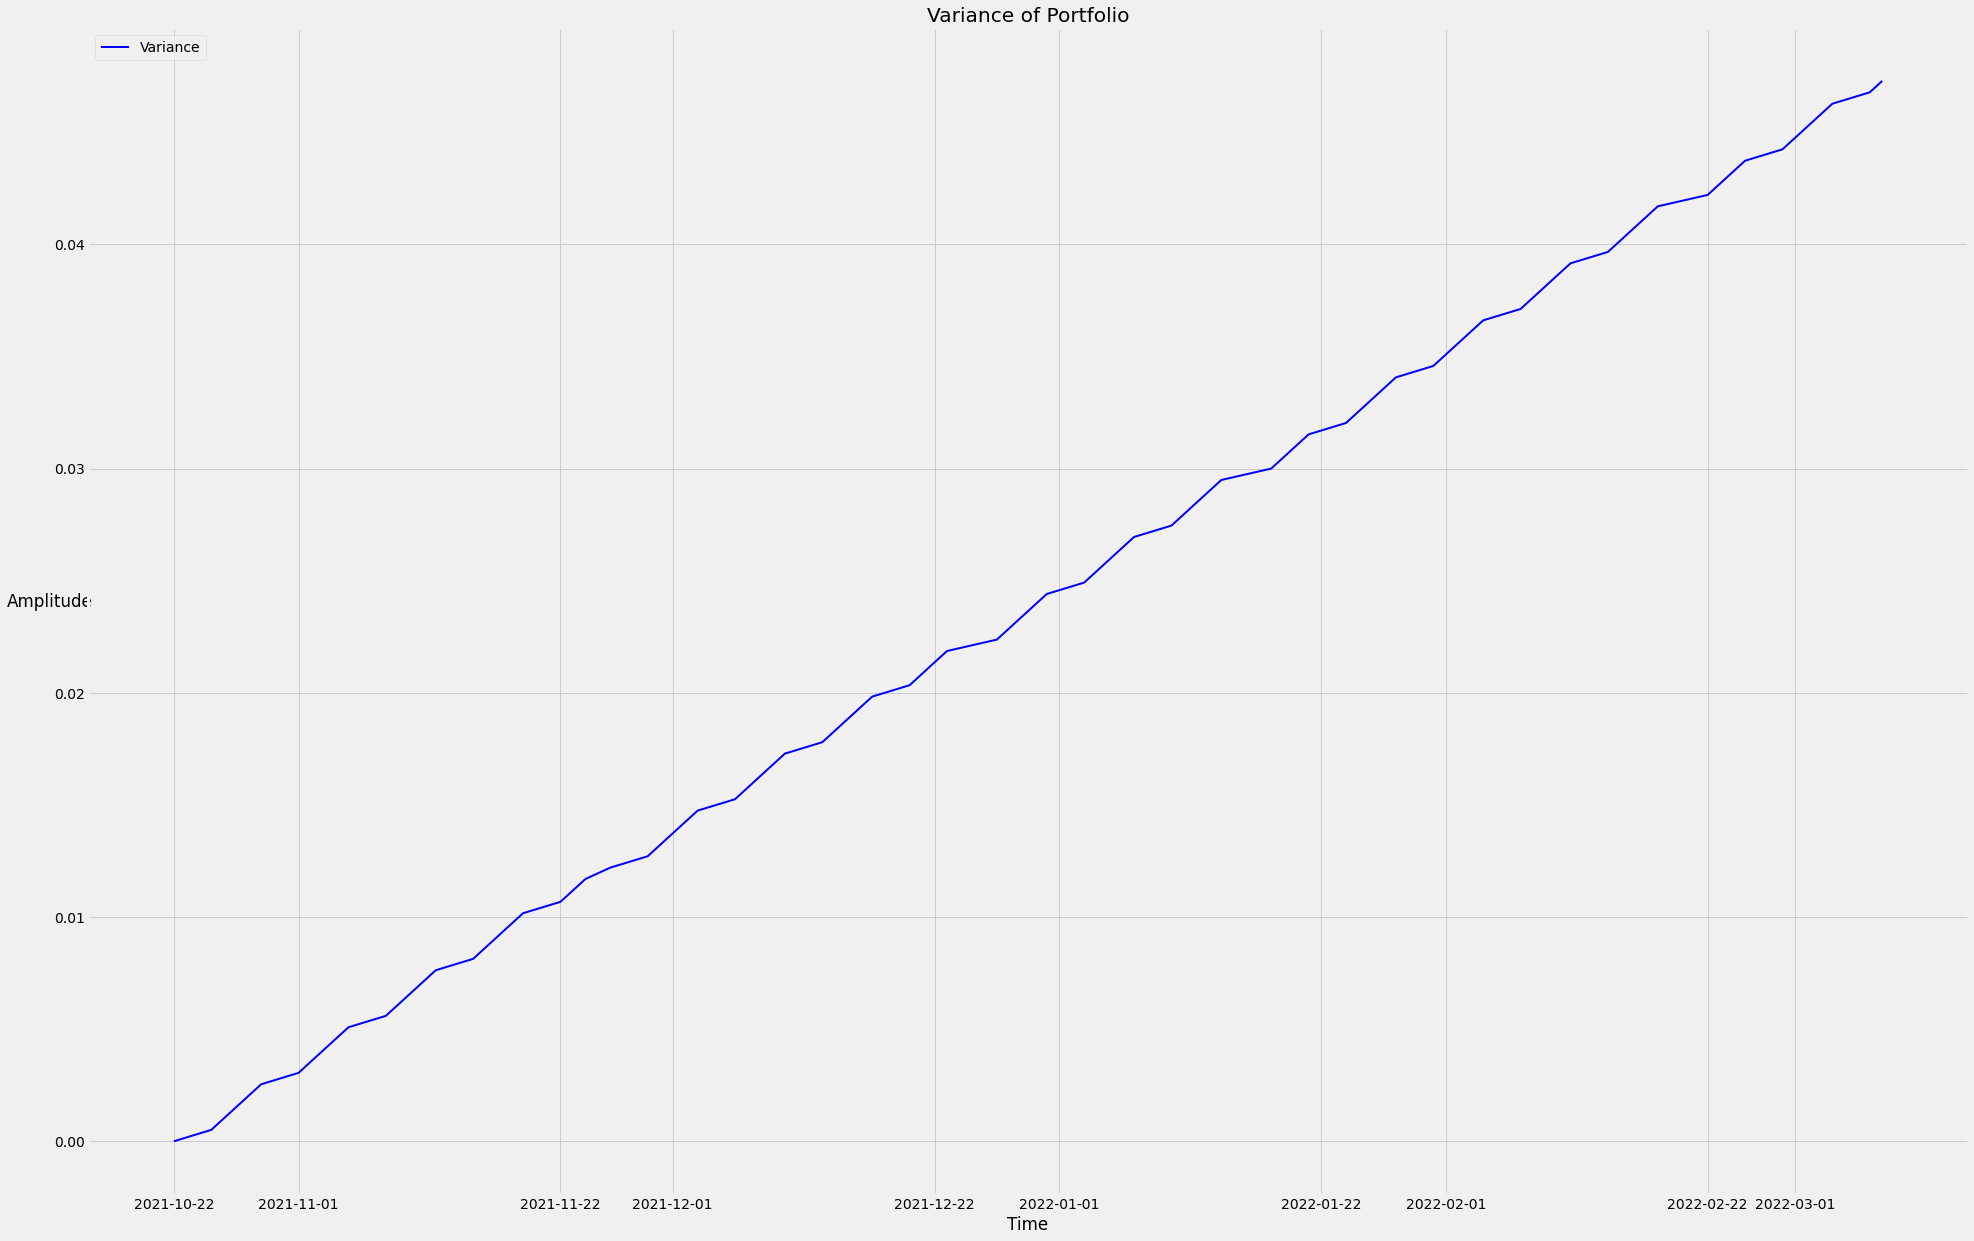

In [230]:
#portfolio variance time series graph
var = dfReturns["Portfolio_Variance"]
plt.figure(figsize=(30, 20))
plt.title("Variance of Portfolio")
plt.xlabel("Time")
plt.ylabel("Amplitude", rotation = 0)
plt.plot(xPort, var, "b", label = "Variance", linewidth = 2)
plt.legend(loc="upper left")
plt.xticks(rotation = 0)
plt.show()

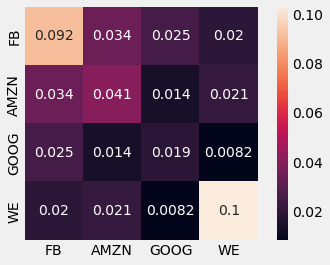

In [231]:
#heatmap of covariance matrix
sns.heatmap(covMatrix30, annot = True, square = True)

In [232]:
#store 30, 90 day, and lifetime (WeWork IPO) means and covariance matrix
returns30 = dfReturns30.mean()
returns90 = dfReturns90.mean()
returnsLife = dfReturns.mean()

print(returnsLife)

FB                   -0.005310
AMZN                 -0.002071
GOOG                 -0.000900
WE                   -0.007933
Portfolio_Variance    0.023644
dtype: float64


In [233]:
#Fetch data from yahoo and save under DataFrame named 'data'
stock = assets
#fetch data from wework IPO to get the most precise portfolio covariances
data = web.DataReader(stock,data_source="yahoo", start = weWorkIPO, end = today)['Adj Close']

In [234]:
#Arrange the data in ascending order
data=data.iloc[::-1]
print (data.round(4))

Symbols          FB       AMZN       GOOG      WE
Date                                             
2022-03-08  193.835  2744.5149  2579.6858   4.945
2022-03-07  187.470  2749.0601  2529.2900   4.840
2022-03-04  200.060  2912.8201  2642.4399   4.770
2022-03-03  202.970  2957.9700  2686.1599   6.140
2022-03-02  208.110  3041.0500  2695.0300   6.320
...             ...        ...        ...     ...
2021-10-28  316.920  3446.5701  2922.5801  10.570
2021-10-27  312.220  3392.4900  2928.5500  10.360
2021-10-26  315.810  3376.0701  2793.4399  12.350
2021-10-25  328.690  3320.3701  2775.4600  13.180
2021-10-22  324.610  3335.5500  2772.5000  13.020

[94 rows x 4 columns]


In [246]:
#Compute stock returns and print the returns in percentage format
stock_ret = data.pct_change()
print (stock_ret.round(4)*100)

Symbols       FB  AMZN  GOOG     WE
Date                               
2022-03-08   NaN   NaN   NaN    NaN
2022-03-07 -3.28  0.17 -1.95  -2.12
2022-03-04  6.72  5.96  4.47  -1.45
2022-03-03  1.45  1.55  1.65  28.72
2022-03-02  2.53  2.81  0.33   2.93
...          ...   ...   ...    ...
2021-10-28 -2.06  2.20 -1.44   3.53
2021-10-27 -1.48 -1.57  0.20  -1.99
2021-10-26  1.15 -0.48 -4.61  19.21
2021-10-25  4.08 -1.65 -0.64   6.72
2021-10-22 -1.24  0.46 -0.11  -1.21

[94 rows x 4 columns]


In [237]:
#Calculate mean returns and covariances of all four the stocks
mean_returns = stock_ret.mean()
cov_matrix = stock_ret.cov()
print (mean_returns)

Symbols
FB      0.006377
AMZN    0.002406
GOOG    0.000953
WE      0.011810
dtype: float64


Symbols        FB      AMZN      GOOG        WE
Symbols                                        
FB       0.001910  0.000590  0.000411  0.000403
AMZN     0.000590  0.000612  0.000273  0.000252
GOOG     0.000411  0.000273  0.000358  0.000041
WE       0.000403  0.000252  0.000041  0.002921


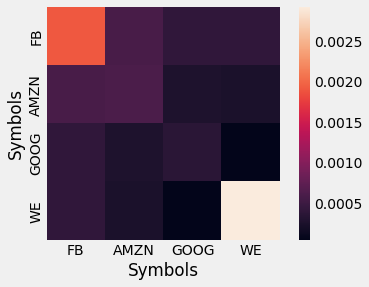

In [238]:
#print heat map for covariances
sns.heatmap(cov_matrix, annot = False, square = True)
print (cov_matrix)

In [239]:
#Set the number of iterations to 1000 for Monte Carlo Simulation
#The Monte Carlo simulation will help us generate the Sharpe curve to find vertex which is the lowest variance portfolio
num_iterations = 1000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [240]:
#Select random weights and normalize to set the sum to 1
for i in range(num_iterations):
  weights = np.array(np.random.random(4))
  weights /= np.sum(weights)
  portfolio_return = np.sum(mean_returns * weights)
  portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
  simulation_res[0,i] = portfolio_return
  simulation_res[1,i] = portfolio_std_dev
#Calculate Sharpe ratio and store it in the array
  simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
  for j in range(len(weights)):
    simulation_res[j+3,i] = weights[j]

In [241]:
#create and print the simulation dataframe
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])
print (sim_frame.head())
print (sim_frame.tail())

        ret     stdev    sharpe        FB      AMZN      GOOG        WE
0  0.006056  0.026353  0.229813  0.208728  0.291809  0.172743  0.326719
1  0.007266  0.030333  0.239533  0.265803  0.199082  0.113106  0.422010
2  0.006338  0.028286  0.224068  0.014858  0.408610  0.142649  0.433883
3  0.005124  0.026888  0.190566  0.443490  0.074475  0.329389  0.152647
4  0.003640  0.025178  0.144580  0.382570  0.223777  0.367200  0.026453
          ret     stdev    sharpe        FB      AMZN      GOOG        WE
995  0.004902  0.023937  0.204800  0.160564  0.496464  0.125872  0.217100
996  0.005362  0.025429  0.210849  0.288860  0.338676  0.156025  0.216439
997  0.005889  0.026641  0.221046  0.339173  0.173139  0.225667  0.262021
998  0.004525  0.022442  0.201635  0.113127  0.442207  0.231351  0.213316
999  0.005597  0.025166  0.222398  0.196477  0.353401  0.167852  0.282271


In [243]:
#find lowest variance of the Monte Carldo simulation
minVarPort = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print(minVarPort)

ret       0.002023
stdev     0.018081
sharpe    0.111869
FB        0.027396
AMZN      0.118434
GOOG      0.785175
WE        0.068995
Name: 567, dtype: float64


In [244]:
#create a dictionary with port
portfolioInfo = {
    "FB" : minVarPort[3],
    "AMZN" : minVarPort[4],
    "GOOG" : minVarPort[5],
    "WE" : minVarPort[6],
    "Returns" : str(100 * minVarPort[0]) + "%"
}   

for key, value in portfolioInfo.items():
    print(f'{key:20}{value}')

FB                  0.027395632529834544
AMZN                0.11843430225328902
GOOG                0.7851754587321448
WE                  0.06899460648473167
Returns             0.2022710809772563%


In [262]:
#generate portfolio outputs
portReturns = (initialPortfolio * (1 + (minVarPort[0]))) - initialPortfolio
portReturns = portReturns.round(2)

print("Portfolio profit is: $" + str(portReturns))
print("Portfolio Variance is: " + str(minVarPort[1]**2))

Portfolio profit is: $202271.08
Portfolio Variance is: 0.00032692288243992305
